<h2>Project 2: The Perceptron</h2>


<!--announcements-->
<blockquote>
    <center>
    <img src="perceptron.png" width="200px" />
    </center>
      <p><cite><center>"What, we asked, wasn't the Perceptron capable of?"<br>
      Rival, The New Yorker, December 6, 1958 P. 44</center>
      </cite></p>
</blockquote>

<h3>Introduction</h3>
<!--Aðalbrandr-->

<p>In this project, you will implement a simple Perceptron classifier to classify digits (or anything else).</p>

<strong>How to submit:</strong> You can submit your code using the red <strong>Submit</strong> button above. This button will send any code below surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags below to the autograder, which will then run several tests over your code. By clicking on the <strong>Details</strong> dropdown next to the Submit button, you will be able to view your submission report once the autograder has completed running. This submission report contains a summary of the tests you have failed or passed, as well as a log of any errors generated by your code when we ran it.

Note that this may take a while depending on how long your code takes to run! Once your code is submitted you may navigate away from the page as you desire -- the most recent submission report will always be available from the Details menu.

<p><strong>Evaluation:</strong> Your code will be autograded for technical
correctness. Please <em>do not</em> change the names of any provided functions or classes within the code, or you will wreak havoc on the autograder. However, the correctness of your implementation -- not the autograder's output -- will be the final judge of your score.  If necessary, we will review and grade assignments individually to ensure that you receive due credit for your work.

<p><strong>Academic Dishonesty:</strong> We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else's code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don't try. We trust you all to submit your own work only; <em>please</em> don't let us down. If you do, we will pursue the strongest consequences available to us.

<p><strong>Getting Help:</strong> You are not alone!  If you find yourself stuck  on something, contact the course staff for help.  Office hours, section, and the <a href="https://piazza.com/class/icxgflcnpra3ko">Piazza</a> are there for your support; please use them.  If you can't make our office hours, let us know and we will schedule more.  We want these projects to be rewarding and instructional, not frustrating and demoralizing.  But, we don't know when or how to help unless you ask.  


<p><strong>Python initialization:</strong> Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [30]:
#<GRADED>
import numpy as np
#import matplotlib 
#matplotlib.use('PDF')
from pylab import *
#</GRADED>
import sys
import matplotlib.pyplot as plt
import time

# add p02 folder
sys.path.insert(0, './p02/')

%matplotlib notebook
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.5


<h3> The Perceptron </h3>

<p>The perceptron is a basic linear classifier. The following questions will ask you to finish these functions in a pre-defined order. Unless specified otherwise, do not use loops.<br></p>

<p>(a) Implement the process of updating the weight vector in the following function. (Hint: In Julia, if you compute <code>p=v*w'</code> for row vectors <code>v,w</code>, the output <code>p</code> will be an array. You can call <code>p=p[1]</code> to cast it as a scalar.)  
</p>




In [20]:
#<GRADED>
def perceptronUpdate(x,y,w):
    """
    function w=perceptronUpdate(x,y,w);
    
    Implementation of Perceptron weights updating
    Input:
    x : input vector of d dimensions (d)
    y : corresponding label (-1 or +1)
    w : weight vector of d dimensions
    
    Output:
    w : weight vector after updating (d)
    """
    assert(y in {-1,1})
    assert(len(w.shape)==1), "At the update w must be a vector not a matrix (try w=w.flatten())"
    assert(len(x.shape)==1), "At the update x must be a vector not a matrix (try x=x.flatten())"
    w=w+y*x
    ## fill in code ...
    ## ... until here
    return w.flatten()
#</GRADED>

In [22]:
from numpy.random import rand
from numpy.linalg import *
# test the update code:
x=rand(5) # random weight vector
w=rand(5) # random feature vector
y=-1 # random label
wnew=perceptronUpdate(x,y,w.copy()) # do a perceptron update
assert(norm(wnew-w+x)<1e-10), "perceptronUpdate didn't pass the test : (" # if correct, this should return 0
print("Looks like you passed the update test : )")

Looks like you passed the update test : )


<p>(b) Implement function <b><code>perceptron</code></b>. This should contain a loop that calls 
<b><code>perceptronUpdate</code></b>
 until it converges or the maximum iteration count, 100, has been reached.
 Make sure you randomize the order of the training data on each iteration. </p>

In [23]:
#<GRADED>
def perceptron(xs,ys):
    """
    function w=perceptron(xs,ys);
    
    Implementation of a Perceptron classifier
    Input:
    xs : n input vectors of d dimensions (nxd)
    ys : n labels (-1 or +1)
    
    Output:
    w : weight vector (1xd)
    b : bias term
    """

    assert(len(xs.shape)==2), "The first input to Perceptron must be a _matrix_ of row input vecdtors."
    assert(len(ys.shape)==1), "The second input to Perceptron must be a _vector_ of n labels (try ys.flatten())."
        
    n, d = xs.shape     # so we have n input vectors, of d dimensions each
    
    
    ## fill in code ...
    x = np.hstack((xs, np.ones((n,1), dtype=xs.dtype)))
    w = np.zeros(d+1, dtype=xs.dtype)
    
    while True:
        m = 0
        for r in range(n):
            row = x[r]
            lbl = ys[r]
            if (lbl * w.dot(row) <= 0):
                w = perceptronUpdate(row, lbl, w)
                m += 1
        if m == 0:
            break
    
    b = w[-1]
    w = w[:-1]
    
    ## ... until here
    return (w,b)

#</GRADED>

<p> You can use the following script to test your code and visualize your perceptron on linearly separable data in 2 dimensions. Your classifier should find a separating hyperplane on such data.   </p>

Looks like you passed the Perceptron test! :o)


<IPython.core.display.Javascript object>


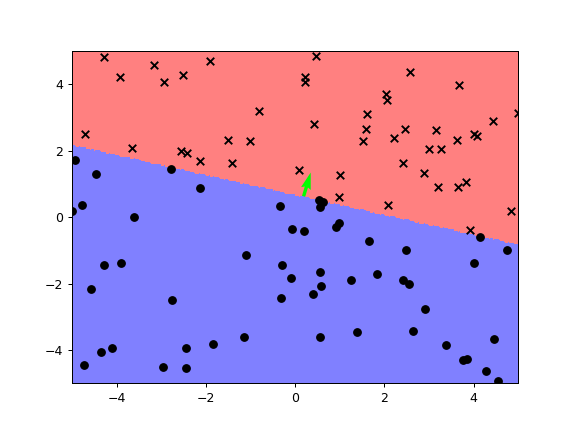

In [25]:
# number of input vectors
N = 100

# generate random (linarly separable) data
xs = np.random.rand(N, 2)*10-5

# defining random hyperplane
w0 = np.random.rand(2)
b0 = rand()*2-1;

# assigning labels +1, -1 labels depending on what side of the plane they lie on
ys = np.sign(xs.dot(w0)+b0)

# call perceptron to find w from data
w,b = perceptron(xs.copy(),ys.copy())

# test if all points are classified correctly
assert (all(np.sign(ys*(xs.dot(w)+b))==1.0))  # yw'x should be +1.0 for every input
print("Looks like you passed the Perceptron test! :o)")

# we can make a pretty visualizxation
from helperfunctions import visboundary
visboundary(w,b,xs,ys)

Text(0.5,1,'Use shift-click to add negative points.')

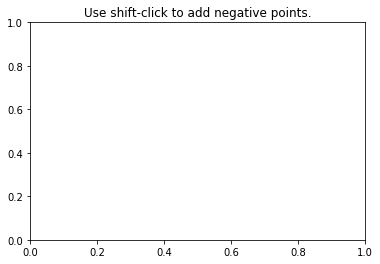

In [11]:
from numpy import *

def onclick(event):
    global w,b,ldata,ax,line,xydata

    pos=np.array([[event.xdata],[event.ydata]])
    if event.key == 'shift': # add positive point
        color='or'
        label=1
    else: # add negative point
        color='ob'
        label=-1    
    ax.plot(pos[0],pos[1],color)
    ldata.append(label);
    xydata=np.vstack((xydata,pos.T))
    
    # call Perceptron function
    w,b=perceptron(xydata,np.array(ldata).flatten())

    # draw decision boundary
    q=-b/(w**2).sum() *w;
    if line==None:
        line, = ax.plot([q[0]-w[1],q[0]+w[1]],[q[1]+w[0],q[1]-w[0]],'b--')
    else:
        line.set_data([q[0]-w[1],q[0]+w[1]],[q[1]+w[0],q[1]-w[0]])
        


xydata=rand(0,2)
ldata=[]
w=zeros(2)
b=0
line=None

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(0,1)
plt.ylim(0,1)
cid = fig.canvas.mpl_connect('button_press_event', onclick)
title('Use shift-click to add negative points.')

In [26]:
w,b=perceptron(xydata,np.array(ldata).flatten())
xydata

array([], shape=(0, 2), dtype=float64)

In [27]:
# w,b=perceptron(Xdata,np.array(ldata))
q=-b/(w**2).sum() *w;
line, = ax.plot([q[0]-w[1],q[0]+w[1]],[q[1]+w[0],q[1]-w[0]],'b--')
line,=ax.plot([0.2,0.2],[0.8,0.8])

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


<p>(c) 
	Implement 
<b><code>classifyLinear</code></b>
 that applies the weight vector and bias to the input vector. (The bias is an optional parameter. If it is not passed in, assume it is zero.) Make sure that the predictions returned are either 1 or -1.</p> 



In [28]:
#<GRADED>
def classifyLinear(xs,w,b):
    """
    function preds=classifyLinear(xs,w,b)
    
    Make predictions with a linear classifier
    Input:
    xs : n input vectors of d dimensions (nxd) [could also be a single vector of d dimensions]
    w : weight vector of dimensionality d
    b : bias (scalar)
    
    Output:
    preds: predictions (1xn)
    """    
    w = w.flatten()    
    predictions=np.zeros(xs.shape[0])
    ## fill in code ...
    n=xs.shape[0]
    if b is None:
        b=0
    w=np.hstack((w,b))
    x=np.hstack((xs,np.ones((n,1),dtype=xs.dtype)))
    y=x.dot(w)
    predictions=np.array([1 if i>0 else -1 for i in y])
    ## ... until here
    return predictions
#</GRADED>

In [29]:
# test classifyLinear code:
xs=rand(1000,2)-0.5 # draw random data 
w0=np.array([0.5,-0.3]) # define a random hyperplane 
b0=-0.1 # with bias -0.1
ys=np.sign(xs.dot(w0)+b0) # assign labels according to this hyperplane (so you know it is linearly separable)
assert (all(np.sign(ys*classifyLinear(xs,w0,b0))==1.0))  # the original hyperplane (w0,b0) should classify all correctly
print("Looks like you passed the classifyLinear test! :o)")

Looks like you passed the classifyLinear test! :o)
